<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/M3A_Py_ML_RegLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression





The dataset you provided appears to be a sample of insurance data. It contains three columns:

- Claim: This column likely indicates whether a claim was filed (possibly a binary value, 0 for no claim, 1 for claim filed). In this sample data, the value is consistently 0, which could indicate these are all policies where no claim was filed, or it could be a placeholder value.
- Policy_Duration: This column represents the duration of the insurance policy in years (e.g., 5.5 years).
- Premium: This column represents the annual premium paid for the insurance policy (e.g., $375).

It could be used to analyze factors that affect insurance premiums, such as the duration of the policy. For instance, an insurance company might charge a higher premium for a policy with a longer duration.

In [1]:

%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">The <a href="https://twitter.com/hashtag/AI?src=hash&amp;ref_src=twsrc%5Etfw">#AI</a> revolution is here! 🚀 It&#39;s time to embrace the power of intelligent machines to improve lives. Learn about the latest trends and advancements in <a href="https://twitter.com/hashtag/ArtificialIntelligence?src=hash&amp;ref_src=twsrc%5Etfw">#ArtificialIntelligence</a>. <a href="https://t.co/W5U9r7d49D">pic.twitter.com/W5U9r7d49D</a></p>&mdash; AI Enthusiast (@AI_Enthusiast_) <a href="https://twitter.com/AI_Enthusiast_/status/1901808317858517286?ref_src=twsrc%5Etfw">March 6, 2023</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/claims_classif.csv')
df.head()

,Claim,Policy_Duration,Premium
0,0,5.50,375
1,0,3.69,349
2,0,4.84,376
3,0,5.00,364
4,0,4.69,355


The scatter plot shows the actual data points, with each point representing a policy and whether a claim was filed (1) or not (0). The blue curve represents the predicted probability of a claim based on policy duration, as estimated by a logistic regression model.

From the graph, we can see that the probability of a claim increases as the policy duration increases. This suggests that longer policies are more likely to have claims.

<Axes: xlabel='Policy_Duration', ylabel='Claim'>

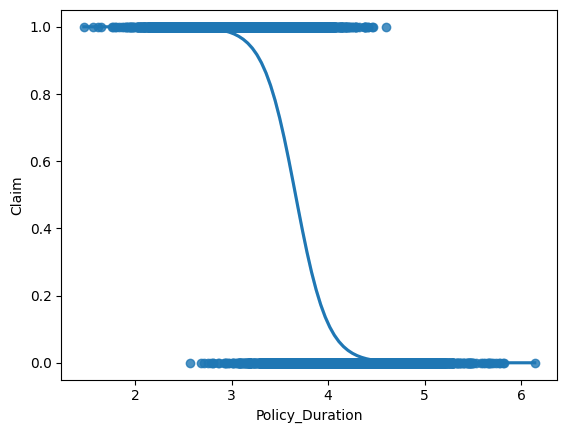

In [ ]:
import seaborn as sns
sns.regplot(x="Policy_Duration", y="Claim", data=df,logistic=True)

From the graph, we can see that the probability of a claim decreases as the premium increases. This suggests that higher premiums are associated with a lower likelihood of claims.

<Axes: xlabel='Premium', ylabel='Claim'>

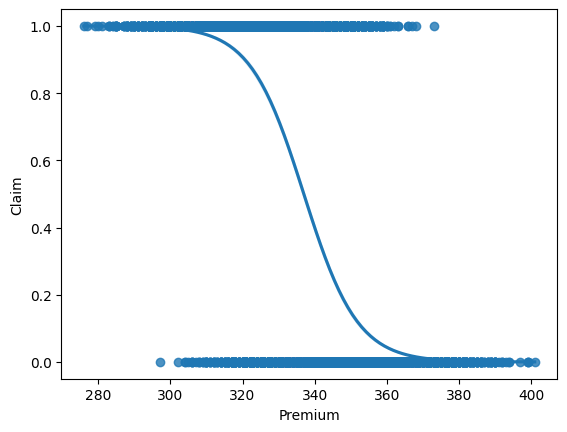

In [ ]:
sns.regplot(x="Premium", y="Claim", data=df,logistic=True)

A train-test split is a crucial technique in machine learning used to evaluate a model's performance on unseen data. The dataset is divided into two subsets: a training set for model training and a testing set for evaluation. This prevents overfitting, where the model becomes too specialized to the training data. By using a separate testing set, we obtain a more realistic assessment of the model's generalization ability. It's essential to ensure a random split, consider data distribution, and potentially use stratified sampling for imbalanced datasets. To further enhance reliability, multiple train-test splits can be performed, and the average performance can be calculate

![](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_12_MicrosoftTeams-image-6.jpg)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Premium','Policy_Duration']],df['Claim'] ,test_size=0.2)
X_train.head(3)

,Premium,Policy_Duration
8616,335,3.25
657,349,4.02
5096,332,3.27


Logistic regression is a statistical method used to predict whether something will happen or not. It's like a scale that predicts the probability of an event, such as whether it will rain tomorrow or if a customer will buy a product. It considers various factors and calculates the likelihood of a specific outcome. Logistic regression is widely used in fields like medicine, marketing, and finance.

![](https://www.saedsayad.com/images/LogReg_1.png)

The score method calculates **accuracy**, which measures how often a model makes correct predictions. It's like hitting the bullseye, but it's important to consider other metrics, especially for imbalanced datasets.

In [ ]:
import sklearn.linear_model as skl_lm
rlog = skl_lm.LogisticRegression()
rlog.fit(X_train,y_train)
train_accuracy= rlog.score(X_train,y_train)*100
train_accuracy

91.9125

`rlog.predict(X_test)` uses a trained logistic regression model (rlog) to predict the probability of a certain event (e.g., a claim) for new data points (X_test). The preds variable stores the predicted probabilities.

In [ ]:
preds = rlog.predict(X_test)
preds

array([1, 1, 0, ..., 1, 1, 0])

 We can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

In [ ]:
sum(y_test==preds)/len(preds) *100

91.9

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test,preds)*100
test_accuracy

91.9

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows how many times the model correctly predicted each class and how many times it made incorrect predictions.

![](https://pbs.twimg.com/media/GaQ4srLXMAAiPt2?format=png&name=small)

[[928  83]
 [ 79 910]]


<Axes: >

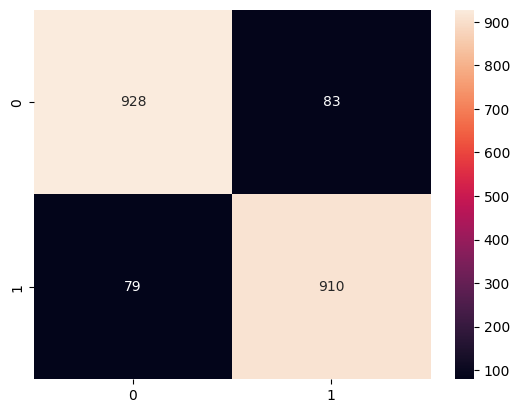

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

Precision and recall are two important metrics used to evaluate the performance of a classification model. They are particularly useful when dealing with imbalanced datasets.

- Precision measures the proportion of positive identifications that were actually correct. In other words, it tells us how accurate the positive predictions are.

- Recall measures the proportion of actual positive cases that were correctly identified. It tells us how well the model finds all the relevant cases.

![](https://pbs.twimg.com/media/GaQ4xssXYAAvG4L?format=png&name=small)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1011
           1       0.92      0.92      0.92       989

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



# Activity: Log Reg

Build a machine learning model to predict insurance claims. Explore and clean the dataset, handle missing values and outliers. Prepare the data by encoding categorical features and splitting it into training and testing sets. Choose a suitable classification algorithm (**Logistic Regression**) and train it on the training data. Evaluate the model's performance on the testing data using metrics like accuracy, precision, and recall. Submit a report summarizing your approach, data preprocessing, model selection, evaluation, and insights, along with the trained model and code.  

data: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/auto%20-%20class.csv`


***Dataset***: This dataset could be used to build a machine learning model to predict the likelihood of a claim being filed based on various factors like age, vehicle age, and previous insurance history.


* **is_male:** Binary variable indicating whether the policyholder is male (1) or female (0).
* **Age:** Age of the policyholder.
* **Driving_License:** Binary variable indicating whether the policyholder has a driving license (1) or not (0).
* **Region_Code:** Numerical code representing the geographic region.
* **Previously_Insured:** Binary variable indicating whether the policyholder had previous insurance (1) or not (0).
* **Vehicle_Age:** Age of the vehicle.
* **Vehicle_Damage:** Binary variable indicating whether the vehicle has previously been damaged (1) or not (0).
* **Policy_Sales_Channel:** Numerical code representing the sales channel through which the policy was purchased.
* **Vintage:** Duration of the policy in days.
* **Annual_Premium:** Annual premium amount.
* **claim:** Binary variable indicating whether a claim was filed (1) or not (0).

